# Netherlands Rent Propertie

dataset from kaggle.  https://www.kaggle.com/juangesino/netherlands-rent-properties

I chose this dataset because I am currently living in the Netherlands and I wanted to work on this project from some relevant data.
## Questions
If you wan to have property for rent, 
 1.  Where is best place?
 1.  What is best property type?
 1.  What is difference between rent / rent_per_sqm

In [157]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# Data understanding

## Load data 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_json('./dataset/properties.json', lines=True)

## overview of data

In [156]:
df.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},Unknown,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},Unknown,Unknown,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en/for-rent/room-amsterdam...,NaN,\n -\n ...,1000.0,\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,{'$date': '2019-07-21T08:44:32.816+0000'},Unknown,Mixed,Yes,true,Shared,Shared,16 years -\n 93 years,16 years -\n 93 years,1 person,Not important,Not i

In [4]:
#describe
df.describe()

,areaSqm,latitude,longitude,rent,additionalCosts,deposit,userId
count,46722.000000,46722.000000,46722.000000,46722.000000,14301.000000,27704.000000,4.662200e+04
mean,31.616626,52.201846,5.314911,667.745516,69.648346,713.447083,3.425398e+06
std,29.863150,0.517203,0.798989,416.667339,132.432817,942.256946,1.327936e+06
min,6.000000,50.770041,3.410016,1.000000,0.000000,0.000000,6.240000e+02
25%,14.000000,51.925491,4.711688,395.000000,0.000000,360.000000,2.894253e+06
50%,20.000000,52.162498,5.082988,550.000000,13.000000,500.000000,3.934324e+06
75%,40.000000,52.370420,5.896362,800.000000,99.000000,850.000000,4.515906e+06
max,675.000000,53.434608,7.206637,5999.000000,5000.000000,107514.000000,4.854533e+06


In [5]:
# columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46722 entries, 0 to 46721
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          46722 non-null  object 
 1   externalId                   46722 non-null  object 
 2   areaRaw                      46722 non-null  object 
 3   areaSqm                      46722 non-null  int64  
 4   city                         46722 non-null  object 
 5   coverImageUrl                46722 non-null  object 
 6   crawlStatus                  46722 non-null  object 
 7   crawledAt                    46722 non-null  object 
 8   datesPublished               46722 non-null  object 
 9   firstSeenAt                  46722 non-null  object 
 10  furnish                      46722 non-null  object 
 11  lastSeenAt                   46722 non-null  object 
 12  latitude                     46722 non-null  float64
 13  longitude       

# Prepare Data

In [6]:
df['crawlStatus'].value_counts()

done           46622
unavailable      100
Name: crawlStatus, dtype: int64

In [343]:
#only succecced data use
sdf = df[df['crawlStatus'] == 'done']

# replace black or unknown to nan
sdf = sdf.replace({'': np.NaN, 'Unknown': np.NaN})

sdf.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,NaN,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},NaN,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},NaN,NaN,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en/for-rent/room-amsterdam...,NaN,\n -\n ...,1000.0,\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,{'$date': '2019-07-21T08:44:32.816+0000'},NaN,Mixed,Yes,true,Shared,Shared,16 years -\n 93 years,16 years -\n 93 years,1 person,Not important,Not important,Not 

In [344]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46622 entries, 0 to 46721
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          46622 non-null  object 
 1   externalId                   46622 non-null  object 
 2   areaRaw                      46622 non-null  object 
 3   areaSqm                      46622 non-null  int64  
 4   city                         46622 non-null  object 
 5   coverImageUrl                46622 non-null  object 
 6   crawlStatus                  46622 non-null  object 
 7   crawledAt                    46622 non-null  object 
 8   datesPublished               46622 non-null  object 
 9   firstSeenAt                  46622 non-null  object 
 10  furnish                      46260 non-null  object 
 11  lastSeenAt                   46622 non-null  object 
 12  latitude                     46622 non-null  float64
 13  longitude       

## Add columns

Adding calculated columns.
 - Distance from main cities
 - Rent price / sqm

In [345]:
# check big cities
sdf['city'].value_counts().nlargest(10)

Amsterdam    8074
Groningen    5070
Rotterdam    4461
Enschede     2297
Den Haag     2183
Utrecht      2178
Eindhoven    1560
Arnhem       1406
Delft        1180
Tilburg      1144
Name: city, dtype: int64

In [346]:
# search lat lng city center
# locations of central station from google map

city_centers = {
    'Amsterdam': [52.37823196620491, 4.90070631722754 ],
    'Groningen': [53.21103935678847, 6.564328632593686],
    'Rotterdam': [51.92516380149483, 4.469178720905283],
    'Enschede': [52.222098002567, 6.889267540520442],
    'DenHaag': [52.08118887326885 ,4.324226198186371],
    'Utrecht': [52.08957212194827 ,5.110265847899617],
    'Eindhoven': [51.443677883268066, 5.478788998167003],
    'Arnhem': [51.98402074900218, 5.901175671194085],
    'Delft': [52.007429044630165, 4.355800912103806],
    'Tilburg': [51.56062731924378, 5.081001298170532],
}

In [347]:
# vectorized haversine function
# https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [348]:
# test 
haversine_np(city_centers['Amsterdam'][0], city_centers['Amsterdam'][1], city_centers['Groningen'][0], city_centers['Groningen'][1])

145.11702446077751

In [349]:
# calclate distance from citiies

#calculate rent / areasqm
sdf['rent_per_areasqm'] = sdf['rent'] / sdf['areaSqm']

for city in city_centers:
    sdf['dist_from_' + city] = haversine_np(sdf['latitude'], sdf['longitude'], city_centers[city][0], city_centers[city][1])
    

    
sdf.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription,rent_per_areasqm,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,NaN,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},NaN,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN,35.714286,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},NaN,NaN,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN,31.666667,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en

In [352]:
sdf.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription,rent_per_areasqm,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,NaN,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},NaN,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN,35.714286,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},NaN,NaN,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN,31.666667,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en

In [357]:
rent_by_city = sdf.groupby('city').agg(count=('_id', 'size'), rent=('rent', 'mean'), rent_per_areasqm=('rent_per_areasqm', 'mean')).sort_values('rent', ascending=False)
rent_by_city

,count,rent,rent_per_areasqm
city,,,
Mantinge,1,5000.000000,833.333333
Wapenveld,1,5000.000000,16.666667
Markelo,2,3500.000000,13.358779
Groet,1,2500.000000,17.857143
Nuland,1,2500.000000,12.500000
Loosdrecht,7,2134.285714,24.906463
amsterdam,1,2100.000000,32.307692
Bleiswijk,5,2046.000000,19.517909
Vreeland,12,1987.500000,17.313272


### key columns

In [298]:
key_columns = [
    'areaSqm', 
#     'city', 
    'furnish', 
    'propertyType', 
    'rent', 
#    'additionalCosts', 
#    'deposit', 
#    'energyLabel', 
    'internet', 
    'kitchen', 
    'living',
    'matchCapacity', 
    'pets',
    'smokingInside',
]

for city in city_centers:
    key_columns.append('dist_from_' + city)

key_columns.append('rent_per_areasqm')

key_columns

['areaSqm',
 'furnish',
 'propertyType',
 'rent',
 'internet',
 'kitchen',
 'living',
 'matchCapacity',
 'pets',
 'smokingInside',
 'dist_from_Amsterdam',
 'dist_from_Groningen',
 'dist_from_Rotterdam',
 'dist_from_Enschede',
 'dist_from_DenHaag',
 'dist_from_Utrecht',
 'dist_from_Eindhoven',
 'dist_from_Arnhem',
 'dist_from_Delft',
 'dist_from_Tilburg',
 'rent_per_areasqm']

In [299]:
kdf = sdf[key_columns]
kdf.head()

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
0,14,Unfurnished,Room,500,Yes,Shared,None,1 person,No,No,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,35.714286
1,30,Furnished,Studio,950,Yes,Own,Own,1 person,No,No,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650,31.666667
2,11,Furnished,Room,1000,Yes,Shared,Shared,1 person,Yes,Yes,4.352933,149.459721,54.126682,139.031203,46.936372,33.848170,109.516849,82.149140,51.114793,89.172799,90.909091
3,16,Unfurnished,Room,290,Yes,Shared,None,1 person,No,Yes,132.230968,21.953365,186.211090,90.689366,183.236695,141.946528,189.355153,122.799328,186.380767,190.220521,18.125000
4,22,Unfurnished,Room,475,NaN,Own,Own,1 person,No,No,57.210630,199.974032,1.120927,167.664778,19.616407,46.510057,87.703769,97.503210,11.858820,58.501428,21.590909


In [300]:
## top 10 of highest and lowest properties

# top10
top_10 = kdf.sort_values('rent', ascending=False)
top_10.head(100)

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
7829,22,Unfurnished,Room,5999,No,Own,None,1 person,No,No,54.359914,198.887040,9.988895,172.178489,10.000197,50.065485,97.153995,103.291067,2.558410,68.143539,272.681818
14770,6,Uncarpeted,Anti-squat,5999,NaN,NaN,NaN,1 person,By mutual agreement,Not important,51.379566,196.371074,23.710448,177.708110,3.784591,56.114852,110.154342,111.048560,12.012755,81.552202,999.833333
31590,22,Uncarpeted,Room,5999,NaN,NaN,NaN,Not important,By mutual agreement,Not important,54.359914,198.887040,9.988895,172.178489,10.000197,50.065485,97.153995,103.291067,2.558410,68.143539,272.681818
36620,290,Uncarpeted,Apartment,5700,NaN,Shared,Shared,> 5 persons,No,Not important,60.730243,203.424726,2.417044,170.141300,21.343690,49.419468,87.426635,99.621691,13.060479,57.840658,19.655172
11551,300,Unfurnished,Apartment,5000,NaN,NaN,NaN,2 persons,No,No,79.530090,92.078099,123.059253,60.610916,125.177895,75.890286,117.697623,51.759867,126.111993,118.684190,16.666667
1450,120,Furnished,Apartment,5000,Yes,Own,Own,1 person,No,No,1.670264,146.557281,56.677384,136.613050,49.851289,33.906318,109.885741,80.666004,53.926564,90.205051,41.666667
3704,200,Furnished,Apartment,5000,NaN,NaN,NaN,2 persons,By mutual agreement,Not important,17.624740,137.777116,63.383518,119.336418,61.606314,25.563974,99.965668,63.777181,63.760393,84.356373,25.000000
8594,200,Unfurnished,Apartment,5000,NaN,NaN,NaN,2 persons,No,No,53.033394,198.100316,22.013839,178.285527,2.856473,56.455287,108.937099,111.176651,10.125384,80.133062,25.000000
17288,6,Unfurnished,Room,5000,NaN,NaN,NaN,1 person,By mutual agreement,Not important,123.554565,46.351421,173.762733,66.584995,173.203196,127.616693,168.397707,101.692256,175.356421,171.689760,833.333333
43118,210,Unfurnished,Apartment,4950,NaN,NaN,NaN,Not important,No,No,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,23.571429


In [301]:
bottom_10 = kdf.sort_values('rent', ascending=True)
bottom_10.head(100)

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
607,12,Furnished,Room,1,Yes,Shared,None,> 5 persons,No,No,89.048049,159.099307,96.619621,81.354260,109.204975,58.892422,51.962043,15.828323,105.465422,62.821863,0.083333
928,20,Furnished,Room,1,Yes,Shared,Own,1 person,Yes,No,40.033906,152.013825,57.408738,111.818973,64.071888,10.395529,73.793472,45.348006,62.695040,60.575042,0.050000
1682,12,Uncarpeted,Room,1,Yes,Shared,Shared,1 person,No,No,69.331091,151.337942,81.819956,88.550629,92.389901,40.205430,59.220011,16.521024,89.515949,60.077929,0.083333
704,8,Furnished,Room,1,NaN,NaN,NaN,1 person,No,No,14.526695,158.731974,43.800836,142.275585,38.173159,28.651529,102.308124,81.320485,41.504162,80.417428,0.125000
2903,10,Unfurnished,Room,1,Yes,Shared,Shared,1 person,No,No,69.260216,150.950341,82.038530,88.248532,92.541344,40.280569,59.590374,16.277853,89.698410,60.462532,0.100000
5284,10,Furnished,Room,1,Yes,Shared,Shared,1 person,Yes,No,52.450076,197.566906,19.562616,176.426410,1.197338,54.456308,106.362295,109.009609,7.818359,77.586788,0.100000
21030,25,Unfurnished,Room,1,Yes,Shared,Own,1 person,Yes,No,64.228245,145.480537,81.481771,87.431414,90.682586,37.434304,65.737952,17.916093,88.413032,64.751653,0.040000
7637,14,Furnished,Room,1,Yes,Shared,Shared,1 person,No,Yes,69.171576,151.230551,81.748183,88.575056,92.289473,40.078920,59.350851,16.579666,89.427981,60.137954,0.071429
5765,10,Uncarpeted,Room,1,NaN,NaN,NaN,1 person,No,No,69.577845,151.184650,82.166852,88.217984,92.729855,40.524112,59.312337,16.175360,89.860642,60.322955,0.100000
22154,15,Unfurnished,Room,1,Yes,Shared,None,1 person,Yes,Yes,87.288482,161.899287,92.818103,85.657575,105.769952,56.230580,48.500418,18.393531,101.847589,58.502661,0.066667


In [302]:
## Remove outliners
kdf = kdf[kdf['rent'] > 100]  
kdf = kdf[kdf['rent'] < 5000]

In [303]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46524 entries, 0 to 46721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   areaSqm              46524 non-null  int64  
 1   furnish              46162 non-null  object 
 2   propertyType         46524 non-null  object 
 3   rent                 46524 non-null  int64  
 4   internet             38435 non-null  object 
 5   kitchen              38957 non-null  object 
 6   living               38035 non-null  object 
 7   matchCapacity        46524 non-null  object 
 8   pets                 46524 non-null  object 
 9   smokingInside        46524 non-null  object 
 10  dist_from_Amsterdam  46524 non-null  float64
 11  dist_from_Groningen  46524 non-null  float64
 12  dist_from_Rotterdam  46524 non-null  float64
 13  dist_from_Enschede   46524 non-null  float64
 14  dist_from_DenHaag    46524 non-null  float64
 15  dist_from_Utrecht    46524 non-null 

## check nan and fill data

In [304]:
# nan data percent

kdf.isnull().mean()

areaSqm                0.000000
furnish                0.007781
propertyType           0.000000
rent                   0.000000
internet               0.173867
kitchen                0.162647
living                 0.182465
matchCapacity          0.000000
pets                   0.000000
smokingInside          0.000000
dist_from_Amsterdam    0.000000
dist_from_Groningen    0.000000
dist_from_Rotterdam    0.000000
dist_from_Enschede     0.000000
dist_from_DenHaag      0.000000
dist_from_Utrecht      0.000000
dist_from_Eindhoven    0.000000
dist_from_Arnhem       0.000000
dist_from_Delft        0.000000
dist_from_Tilburg      0.000000
rent_per_areasqm       0.000000
dtype: float64

In [305]:
#check values

print(f'furnish: {kdf["furnish"].unique()}')
print(f'internet: {kdf["internet"].unique()}')
print(f'kitchen: {kdf["kitchen"].unique()}')
print(f'living: {kdf["living"].unique()}')

furnish: ['Unfurnished' 'Furnished' 'Uncarpeted' nan]
internet: ['Yes' nan 'No']
kitchen: ['Shared' 'Own' nan 'None']
living: ['None' 'Own' 'Shared' nan]


In [306]:
# fill with proper value
kdf = kdf.copy()

kdf['furnish'].replace(np.nan, 'Unfurnished', inplace=True)
kdf["internet"].replace(np.nan, 'No', inplace=True)
kdf["kitchen"].replace(np.nan, 'None', inplace=True)
kdf["living"].replace(np.nan, 'None', inplace=True)

kdf.isnull().mean()

areaSqm                0.0
furnish                0.0
propertyType           0.0
rent                   0.0
internet               0.0
kitchen                0.0
living                 0.0
matchCapacity          0.0
pets                   0.0
smokingInside          0.0
dist_from_Amsterdam    0.0
dist_from_Groningen    0.0
dist_from_Rotterdam    0.0
dist_from_Enschede     0.0
dist_from_DenHaag      0.0
dist_from_Utrecht      0.0
dist_from_Eindhoven    0.0
dist_from_Arnhem       0.0
dist_from_Delft        0.0
dist_from_Tilburg      0.0
rent_per_areasqm       0.0
dtype: float64

In [307]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46524 entries, 0 to 46721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   areaSqm              46524 non-null  int64  
 1   furnish              46524 non-null  object 
 2   propertyType         46524 non-null  object 
 3   rent                 46524 non-null  int64  
 4   internet             46524 non-null  object 
 5   kitchen              46524 non-null  object 
 6   living               46524 non-null  object 
 7   matchCapacity        46524 non-null  object 
 8   pets                 46524 non-null  object 
 9   smokingInside        46524 non-null  object 
 10  dist_from_Amsterdam  46524 non-null  float64
 11  dist_from_Groningen  46524 non-null  float64
 12  dist_from_Rotterdam  46524 non-null  float64
 13  dist_from_Enschede   46524 non-null  float64
 14  dist_from_DenHaag    46524 non-null  float64
 15  dist_from_Utrecht    46524 non-null 

array([[<AxesSubplot:title={'center':'areaSqm'}>,
        <AxesSubplot:title={'center':'rent'}>,
        <AxesSubplot:title={'center':'dist_from_Amsterdam'}>,
        <AxesSubplot:title={'center':'dist_from_Groningen'}>],
       [<AxesSubplot:title={'center':'dist_from_Rotterdam'}>,
        <AxesSubplot:title={'center':'dist_from_Enschede'}>,
        <AxesSubplot:title={'center':'dist_from_DenHaag'}>,
        <AxesSubplot:title={'center':'dist_from_Utrecht'}>],
       [<AxesSubplot:title={'center':'dist_from_Eindhoven'}>,
        <AxesSubplot:title={'center':'dist_from_Arnhem'}>,
        <AxesSubplot:title={'center':'dist_from_Delft'}>,
        <AxesSubplot:title={'center':'dist_from_Tilburg'}>],
       [<AxesSubplot:title={'center':'rent_per_areasqm'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

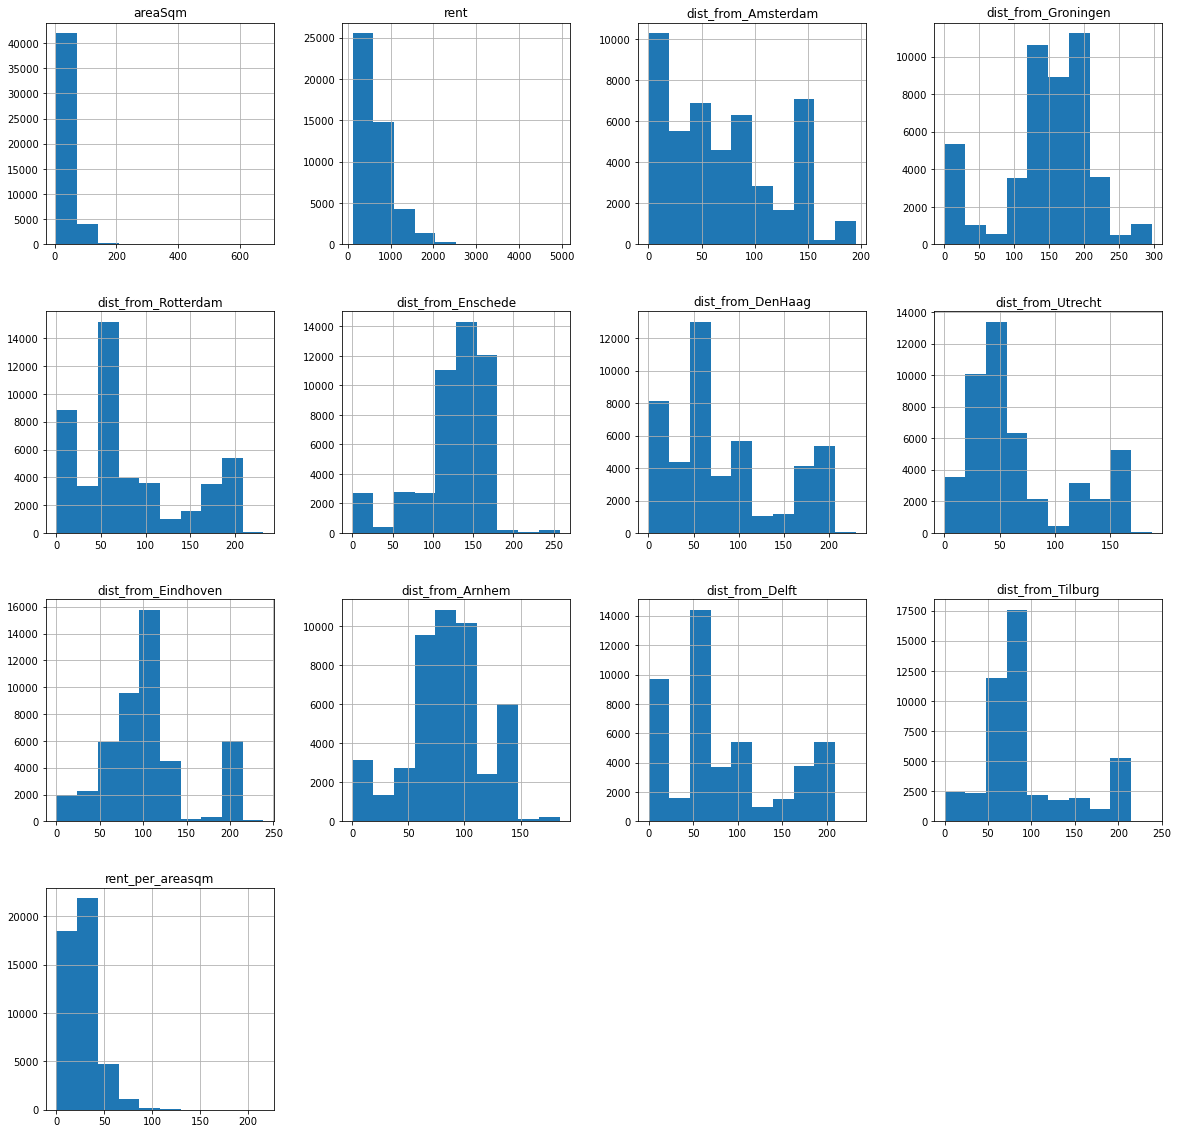

In [308]:
kdf.hist(figsize = (20,20))

## check category cols 

In [309]:
cat_kdf = kdf.select_dtypes(include=['object']).copy()

for col in cat_kdf:
    print(f'---- {col} ----')
    print(kdf[col].value_counts())
    print('\n')


---- furnish ----
Furnished      20858
Unfurnished    19573
Uncarpeted      6093
Name: furnish, dtype: int64


---- propertyType ----
Room                 30370
Apartment            11746
Studio                4079
Anti-squat             324
Student residence        5
Name: propertyType, dtype: int64


---- internet ----
Yes    35604
No     10920
Name: internet, dtype: int64


---- kitchen ----
Shared    27563
Own       11124
None       7837
Name: kitchen, dtype: int64


---- living ----
None      18950
Shared    15642
Own       11932
Name: living, dtype: int64


---- matchCapacity ----
1 person         30857
2 persons        10255
Not important     2764
3 persons         1084
4 persons          872
> 5 persons        384
5 persons          308
Name: matchCapacity, dtype: int64


---- pets ----
No                     42609
By mutual agreement     1979
Yes                     1936
Name: pets, dtype: int64


---- smokingInside ----
No               39620
Yes               3614
Not import

In [310]:
# check data by property type

kdf.groupby('propertyType').mean()

,areaSqm,rent,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
propertyType,,,,,,,,,,,,,
Anti-squat,56.533951,288.296296,112.118236,152.481847,119.407223,112.539739,127.607987,97.004769,99.419072,84.921792,125.207523,103.568463,7.498038
Apartment,68.667972,1145.195811,65.551383,149.603925,78.558006,127.138606,81.464298,63.026221,100.279624,82.166376,81.156995,89.540272,18.490111
Room,17.136813,481.263648,70.085116,145.840662,82.170611,125.790261,84.547239,68.097094,107.185353,86.181898,84.124347,95.880481,32.262214
Student residence,11.400000,396.000000,62.745902,146.981473,62.528316,147.164579,64.488271,64.345569,115.129559,100.625914,62.716179,94.124520,34.616667
Studio,29.998774,717.017161,73.041167,147.341048,84.191205,126.485083,88.422527,67.484094,100.503300,83.813043,87.542330,90.788479,26.152721


In [311]:
# remove small city

# smallcities = kdf[kdf.groupby(['city'])['city'].transform('count') < 5]['city'].tolist()
# print('list', len(smallcities))
# print('pre shape', kdf.shape)

# kdf = kdf[~kdf.city.isin(smallcities)]
# kdf.shape

# print('post shape', df.shape)


In [312]:
# remove student residence and Anti-squat
kdf = kdf[~kdf.propertyType.isin(['Student residence', 'Anti-squat'])]

# Create Model 

In [313]:
## create dummy

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


In [314]:
ddf = create_dummy_df(kdf, cat_kdf, dummy_na=False) 
ddf.head()

,areaSqm,rent,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm,furnish_Uncarpeted,furnish_Unfurnished,propertyType_Room,propertyType_Studio,internet_Yes,kitchen_Own,kitchen_Shared,living_Own,living_Shared,matchCapacity_2 persons,matchCapacity_3 persons,matchCapacity_4 persons,matchCapacity_5 persons,matchCapacity_> 5 persons,matchCapacity_Not important,pets_No,pets_Yes,smokingInside_Not important,smokingInside_Yes
0,14,500,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,35.714286,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,30,950,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650,31.666667,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,11,1000,4.352933,149.459721,54.126682,139.031203,46.936372,33.848170,109.516849,82.149140,51.114793,89.172799,90.909091,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
3,16,290,132.230968,21.953365,186.211090,90.689366,183.236695,141.946528,189.355153,122.799328,186.380767,190.220521,18.125000,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,22,475,57.210630,199.974032,1.120927,167.664778,19.616407,46.510057,87.703769,97.503210,11.858820,58.501428,21.590909,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


## Cteate Model
y = rent_per_areasqm

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Split into explanatory and response variables
X = ddf.drop('rent_per_areasqm', axis=1)
y = ddf['rent_per_areasqm']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print('test_score:', test_score,  'train_score:', train_score)


test_score: 0.5928739216248797 train_score: 0.5764674425069586


In [316]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(30)

,est_int,coefs,abs_coefs
14,propertyType_Room,4.904291,4.904291
20,living_Shared,4.597808,4.597808
15,propertyType_Studio,2.573489,2.573489
12,furnish_Uncarpeted,-2.513445,2.513445
19,living_Own,-2.187633,2.187633
25,matchCapacity_> 5 persons,-1.701790,1.701790
23,matchCapacity_4 persons,1.063216,1.063216
13,furnish_Unfurnished,-1.051318,1.051318
24,matchCapacity_5 persons,-0.913773,0.913773
18,kitchen_Shared,0.799669,0.799669


In [317]:
#not_city_coef = coef_df[~coef_df['est_int'].str.startswith('city_')]
#not_city_coef

In [318]:
dist_from_coef = coef_df[coef_df["est_int"].str.startswith('dist_from_')]
dist_from_coef

,est_int,coefs,abs_coefs
10,dist_from_Delft,0.399882,0.399882
4,dist_from_Rotterdam,-0.246878,0.246878
2,dist_from_Amsterdam,-0.163923,0.163923
6,dist_from_DenHaag,-0.135101,0.135101
8,dist_from_Eindhoven,-0.090322,0.090322
7,dist_from_Utrecht,0.076160,0.076160
11,dist_from_Tilburg,0.062252,0.062252
9,dist_from_Arnhem,0.038721,0.038721
5,dist_from_Enschede,0.012909,0.012909
3,dist_from_Groningen,-0.002547,0.002547


## Model2 
y = rent

In [319]:
#Split into explanatory and response variables
X2 = ddf.drop('rent', axis=1)
y2 = ddf['rent']

#Split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=True)

lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X2_train, y2_train) #Fit

#Predict using your model
y2_test_preds = lm_model2.predict(X2_test)
y2_train_preds = lm_model2.predict(X2_train)

#Score using your model
test2_score = r2_score(y2_test, y2_test_preds)
train2_score = r2_score(y2_train, y2_train_preds)

print('test_score:', test2_score,  'train_score:', train2_score)


test_score: 0.7910037131862572 train_score: 0.7797182405959732


In [320]:
coef_df2 = coef_weights(lm_model2.coef_, X2_train)
coef_df2.head(30)

,est_int,coefs,abs_coefs
14,propertyType_Room,4.904291,4.904291
20,living_Shared,4.597808,4.597808
15,propertyType_Studio,2.573489,2.573489
12,furnish_Uncarpeted,-2.513445,2.513445
19,living_Own,-2.187633,2.187633
25,matchCapacity_> 5 persons,-1.701790,1.701790
23,matchCapacity_4 persons,1.063216,1.063216
13,furnish_Unfurnished,-1.051318,1.051318
24,matchCapacity_5 persons,-0.913773,0.913773
18,kitchen_Shared,0.799669,0.799669


In [321]:
dist_from_coef2 = coef_df2[coef_df2["est_int"].str.startswith('dist_from_')]
dist_from_coef2

,est_int,coefs,abs_coefs
10,dist_from_Tilburg,0.399882,0.399882
4,dist_from_Enschede,-0.246878,0.246878
2,dist_from_Groningen,-0.163923,0.163923
6,dist_from_Utrecht,-0.135101,0.135101
8,dist_from_Arnhem,-0.090322,0.090322
7,dist_from_Eindhoven,0.076160,0.076160
9,dist_from_Delft,0.038721,0.038721
1,dist_from_Amsterdam,0.019567,0.019567
5,dist_from_DenHaag,0.012909,0.012909
3,dist_from_Rotterdam,-0.002547,0.002547
